#### Descrição do negócio 

**Nome da empresa:** Elegance Homme

**Sobre:** É uma empresa no segmento de varejo, especializada em revenda de roupas e acessórios da Calvin Klein para todas as idades. 

**Objetivo:** Com base nos dados fornecidos pela área de negócio, a equipe de dados deve analisar as preferências de compra dos clientes, categorias de produtos e valores de compra, a fim de identificar os produtos mais populares, segmentos de clientes mais promissores e oportunidades de cross-selling (Promoção de produtos relacionados). A partir disso, a equipe de dados irá desenvolver estratégias personalizadas de marketing e promoções para a campanha de Black Friday 2023, visando aumentar as vendas, a satisfação do cliente e a fidelidade à marca.

#### Significado das colunas:

* `User_ID`: Identificador do cliente
* `Product_ID`: Identificador do produto
* `Genêro`: Genêro (F - Feminino / M - Masculino)
* `Idade`: Idade
* `Ocupação`: Ocupação
* `Categoria_Cidade`: Categoria da cidade (Pequena / Média / Grande)
* `Status_Civil`: Status Cívil (Casado / Solteiro)
* `Categoria_Produto`: Categoria do produto
* `Valor_Compra`: Valor da compra
%md

##### Importando bibliotecas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Carregando base de dados

In [0]:
# Lendo o arquivo 
df = spark.read.csv('/FileStore/tables/train.csv', header=True, sep=',')
df = df.toPandas()

##### Exploração inicial dos dados

In [0]:
# Visualizando as primeiras linhas
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,None,None,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,None,None,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,None,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,None,None,7969


In [0]:
# Número de linhas e colunas
df.shape

Out[4]: (550068, 12)

In [0]:
# Tipo de dados
df.dtypes

Out[5]: User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
Purchase                      object
dtype: object

##### Limpeza e transformação dos dados

In [0]:
# Dropando as colunas 'Product_ID', Product_Category_2' e 'Product_Category_3' pois não vamos precisar delas 
# Vamos nos basear na coluna 'Product_Category_1'
df.drop(['Product_ID','Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [0]:
# Alterando o nome das colunas 
df.rename(columns={'Gender' : 'Gênero', 'Age' : 'Idade', 'Occupation' : 'Ocupação', 'City_Category' : 'Categoria_Cidade', 'Stay_In_Current_City_Years' : 'Anos_Na_Cidade', 'Marital_Status' : 'Status_Civil', 'Product_Category_1' : 'Categoria_Produto', 'Purchase' : 'Valor_Compra' }, inplace = True)

In [0]:
# Conferindo 
df.columns

Out[8]: Index(['User_ID', 'Gênero', 'Idade', 'Ocupação', 'Categoria_Cidade',
       'Anos_Na_Cidade', 'Status_Civil', 'Categoria_Produto', 'Valor_Compra'],
      dtype='object')

**Transformando as colunas**

- **Ocupação** -> Substituir os valores por lista de ocupações
- **Categoria_Cidade** -> Substituir os valores: A - Grande / B - Média / C - Pequena
- **Status_Civil** -> Substituir os valores: 0 -> Solteiro / 1 -> Casado
- **Categoria_Produto** -> Substituir os valores por lista de categórias
- **Valor_Compra** -> Alterar para float

In [0]:
# Visualizando a quantidade de valores distintos em cada coluna
df.nunique()

Out[9]: User_ID               5891
Gênero                   2
Idade                    7
Ocupação                21
Categoria_Cidade         3
Anos_Na_Cidade           5
Status_Civil             2
Categoria_Produto       20
Valor_Compra         18105
dtype: int64

In [0]:
# Alterando os valores da coluna 'Ocupação'
ocupacoes_nomes = ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Arquiteto', 'Jornalista', 'Dentista', 'Psicólogo', 'Contador', 'Programador', 'Consultor', 'Farmacêutico', 'Gerente', 'Nutricionista', 'Estilista', 'Designer', 'Tradutor', 'Fisioterapeuta', 'Artista', 'Cientista', 'Terapeuta']
     
for i in range(21):
    df['Ocupação'].replace(str(i), ocupacoes_nomes[i], inplace=True)

In [0]:
# Alterando os valores da coluna 'Categoria_Cidade'   
Categoria_Cidade = {"A": "Média", "B": "Grande", "C": "Pequena"}
df['Categoria_Cidade'] = df['Categoria_Cidade'].map(Categoria_Cidade)

In [0]:
# Alterando os valores da coluna 'Status_Civil'
Status_Civil = { '0': 'Solteiro', '1': 'Casado'}
df['Status_Civil'] = df['Status_Civil'].map(Status_Civil)

In [0]:
# Alterando os valores da coluna 'Categoria_Produto_1'
categorias = ['Camiseta', 'Calça jeans', 'Bermuda', 'Vestido', 'Blusa', 'Jaqueta', 'Sapato', 'Sapatilha', 'Tênis', 'Cinto', 'Óculos de sol', 'Chapéu', 'Lenço', 'Meia', 'Bolsa', 'Carteira', 'Saia', 'Top', 'Moletom', 'Blazer', 'Gravata']
     
for i in range(1, 21):
    df['Categoria_Produto'].replace(str(i), categorias[i], inplace=True)

In [0]:
# Alterando o tipo da coluna 'Valor_Compra' para float
df['Valor_Compra'] = df['Valor_Compra'].astype(float)

In [0]:
# Visualizando a base após as alterações
df.head()

,User_ID,Gênero,Idade,Ocupação,Categoria_Cidade,Anos_Na_Cidade,Status_Civil,Categoria_Produto,Valor_Compra
0,1000001,F,0-17,Consultor,Média,2,Solteiro,Vestido,8370.0
1,1000001,F,0-17,Consultor,Média,2,Solteiro,Calça jeans,15200.0
2,1000001,F,0-17,Consultor,Média,2,Solteiro,Lenço,1422.0
3,1000001,F,0-17,Consultor,Média,2,Solteiro,Lenço,1057.0
4,1000002,M,55+,Tradutor,Pequena,4+,Solteiro,Tênis,7969.0


In [0]:
# Visualizando o tipo de dados 
print(df.dtypes)

User_ID               object
Gênero                object
Idade                 object
Ocupação              object
Categoria_Cidade      object
Anos_Na_Cidade        object
Status_Civil          object
Categoria_Produto     object
Valor_Compra         float64
dtype: object


##### Análise exploratória de dados

- Qual é o perfil dos clientes que consomem na Black Friday?

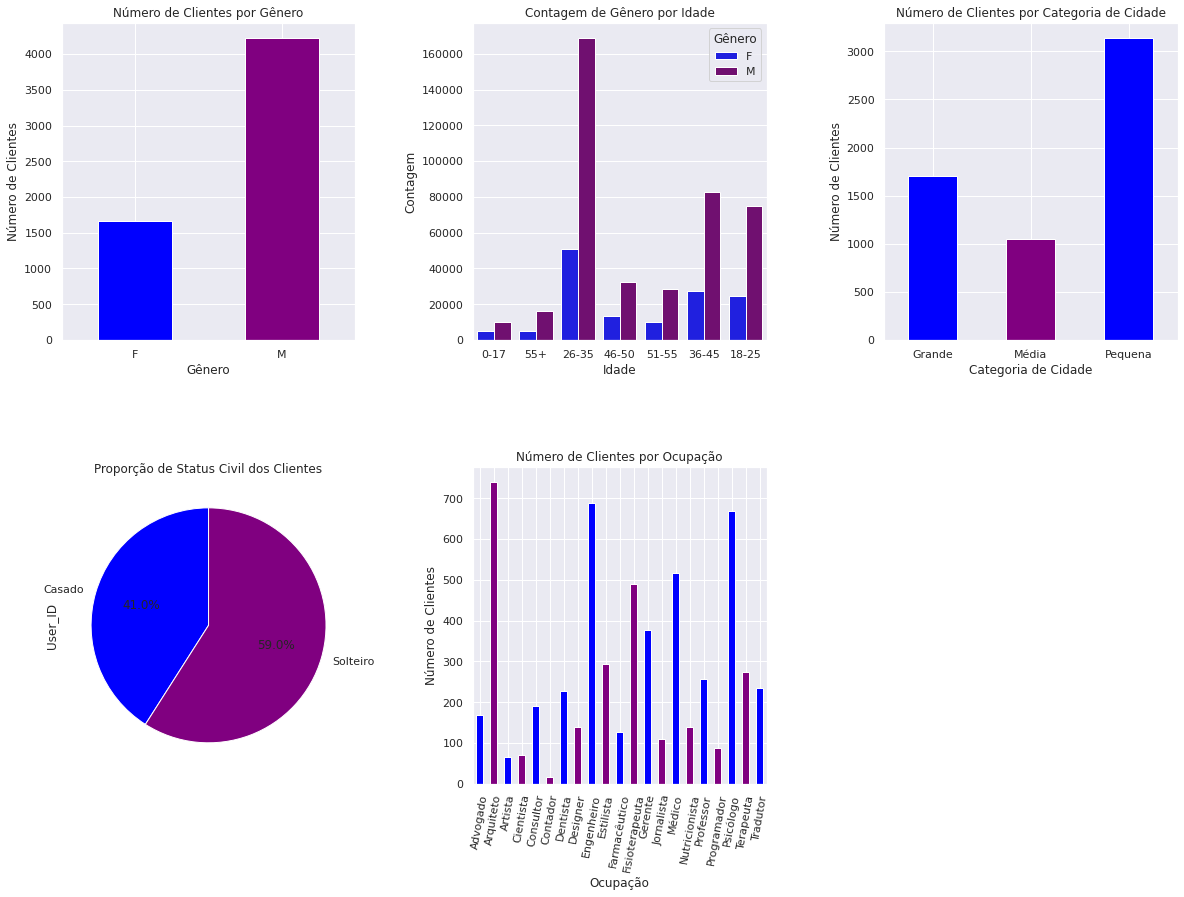

In [0]:
 cores = ['blue', 'purple']

# Criação da figura e dos subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Ajuste do espaçamento vertical e horizontal entre os subplots

# Gráfico 1
clientes_por_genero = df.groupby('Gênero')['User_ID'].nunique()
clientes_por_genero.plot(kind='bar', rot=0, ax=axes[0, 0], color=cores)
axes[0, 0].set_xlabel('Gênero')
axes[0, 0].set_ylabel('Número de Clientes')
axes[0, 0].set_title('Número de Clientes por Gênero')

# Gráfico 2
sns.countplot(x='Idade', hue='Gênero', data=df, palette=cores, ax=axes[0, 1])
axes[0, 1].set_xlabel('Idade')
axes[0, 1].set_ylabel('Contagem')
axes[0, 1].set_title('Contagem de Gênero por Idade')

# Gráfico 3
clientes_por_cidade = df.groupby('Categoria_Cidade')['User_ID'].nunique()
clientes_por_cidade.plot(kind='bar', rot=0, ax=axes[0, 2], color=cores)
axes[0, 2].set_xlabel('Categoria de Cidade')
axes[0, 2].set_ylabel('Número de Clientes')
axes[0, 2].set_title('Número de Clientes por Categoria de Cidade')

# Gráfico 4
status_civil_count = df.groupby('Status_Civil')['User_ID'].count()
status_civil_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1, 0], colors=cores)
axes[1, 0].set_title('Proporção de Status Civil dos Clientes')

# Gráfico 5
clientes_por_ocupacao = df.groupby('Ocupação')['User_ID'].nunique()
clientes_por_ocupacao.plot(kind='bar', rot=80, color=cores, ax=axes[1, 1])
axes[1, 1].set_xlabel('Ocupação')
axes[1, 1].set_ylabel('Número de Clientes')
axes[1, 1].set_title('Número de Clientes por Ocupação')

# Remover o espaço em branco na última posição da linha 2
fig.delaxes(axes[1, 2])

plt.show()

**Visando captar mais clientes do gênero feminino, podemos utilizar tais estrátegias:** 
- Investir em mais produtos voltados para o genêro feminino, tendo a possibilidade de lançar uma coleção próxima a Black Friday com preços mais acessiveis. 
- Oferecer a promoção: compre uma peça com o valor maior de R$:80 e leve um cinto de brinde. A cliente só vai conseguir resgatar a promoção se preencher um formulário com seus dados pessoais: endereço, idade, e-mail. Dessa forma, vamos armanezar em nossa lista de e-mails e disparar outras promoções semanalmente.  

**Com o o objetivo de atingir mais o público das faixas etárias: 0-17 e 18-25, podemos seguir tais estratégias:**

- Parcerias com influenciadores: Colaborar com influenciadores populares entre adolescentes e crianças para promover suas ofertas de Black Friday. Os influenciadores podem criar conteúdo autêntico e envolvente, como avaliações de produtos, unboxings e tutoriais, para promover suas promoções.

**Para realizarmos mais vendas na categoria de região Média, podemos:**

- Oferecer o frete grátis na semana da Black Friday. 
- Investir em anuncios nessa região, ofertando um cupom de desconto de 20% em nosso site, no qual, o cliente só consegue resgatar preenchendo um formulário com seus dados pessoais. Iremos armanezar em nossa base de dados e disparar e-mails e mensagens por whatsapp com as novidades semanais e promoçoes. 

**Consideração do estado civil:**
- Dado que a maioria dos clientes são solteiros, podemos criar ofertas e anuncios que sejam atraentes para essa categoria de clientes. Por exemplo, ofertas especiais para solteiros, como roupas para sair à noite ou roupas casuais para encontros.

- Média de gastos por pessoa

In [0]:
df_compra_transacao = df.groupby("User_ID").agg({"Valor_Compra": "mean"})
print(df_compra_transacao)

df_compra_transacao.mean()

# A média de gastos por pessoa é: R$: 9.568,84

         Valor_Compra
User_ID              
1000001   9545.514286
1000002  10525.610390
1000003  11780.517241
1000004  14747.714286
1000005   7745.292453
...               ...
1006036   8007.894942
1006037   9176.540984
1006038   7502.833333
1006039   7977.283784
1006040   9184.994444

[5891 rows x 1 columns]
Out[63]: Valor_Compra    9568.839914
dtype: float64

- Valor dos gastos por faixa de idade

Out[19]: <AxesSubplot:xlabel='Idade'>

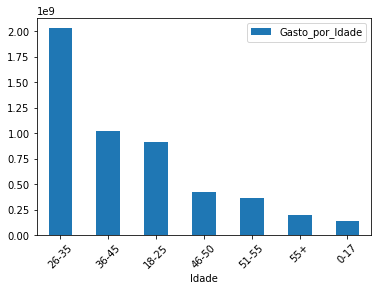

In [0]:
df_idade_gasto = df.groupby('Idade').agg(Gasto_por_Idade=('Valor_Compra', 'sum')).reset_index().sort_values('Gasto_por_Idade', ascending=False)
df_idade_gasto.plot(kind='bar', x='Idade', y='Gasto_por_Idade', rot=45)

# A faixa etária que trouxe mais receita é: 26-35

**Visando manter a maior parte das vendas na faixa etária 26-35 e conseguir impulsionar as outras faixas, podemos:**
- Realizar a criação de um cartão fidelidade, que pontua 1 por compra e oferece um brinde quando o cliente completar 10 compras na loja. Incluindo promoções exclusivas.

- Qual a categoria de produto mais vendido por cidade?

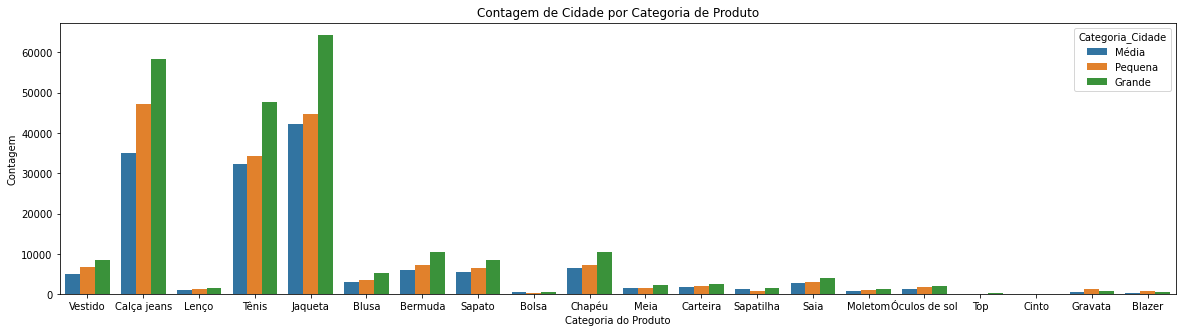

In [0]:
plt.figure(figsize=(20, 5)) 
sns.countplot(x="Categoria_Produto", hue="Categoria_Cidade", data=df)

plt.xlabel('Categoria do Produto')
plt.ylabel('Contagem')
plt.title('Contagem de Cidade por Categoria de Produto')
plt.show()

# A categoria mais vendida em cidade média é: Jaqueta
# A categoria mais vendida em cidade Pequena é: Calça Jeans
# A categoria mais vendida em cidade Grande é: Jaqueta

**Estratégia para alcançar um número de vendas parecido para todos os produtos:**
- Personalizar anuncios elaborados de produtos que menos vendem em cada categoria de cidade que apareçam em destaque quando for realizado uma busca.

- Qual a categoria do produto mais vendido?

In [0]:
produto_mais_vendido = df["Categoria_Produto"].value_counts().index[0]
print(produto_mais_vendido )

# O produto mais vendido, em geral, é: Jaqueta

Jaqueta


- Quais são os 3 produtos mais comprados em Cidade Pequena?

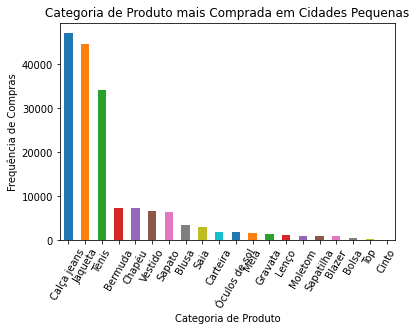

In [0]:
df_pequena = df[df['Categoria_Cidade'] == 'Pequena']

categorias_produto_mais_compradas = df_pequena['Categoria_Produto'].value_counts()
cores = sns.color_palette(n_colors=len(categorias_produto_mais_compradas))
categorias_produto_mais_compradas.plot(kind='bar', rot=60, color=cores)

plt.xlabel('Categoria de Produto')
plt.ylabel('Frequência de Compras')
plt.title('Categoria de Produto mais Comprada em Cidades Pequenas')


plt.show()
# Os 3 produtos mais vendidos em Cidade Pequena são: Calça Jeans, Jaqueta e Tenis

Fizemos essa visualização para identificar qual a ordem dos produtos mais comprados na categoria de região que é predominante no perfil dos clientes.

- Qual o produto mais comprado por cada gênero?

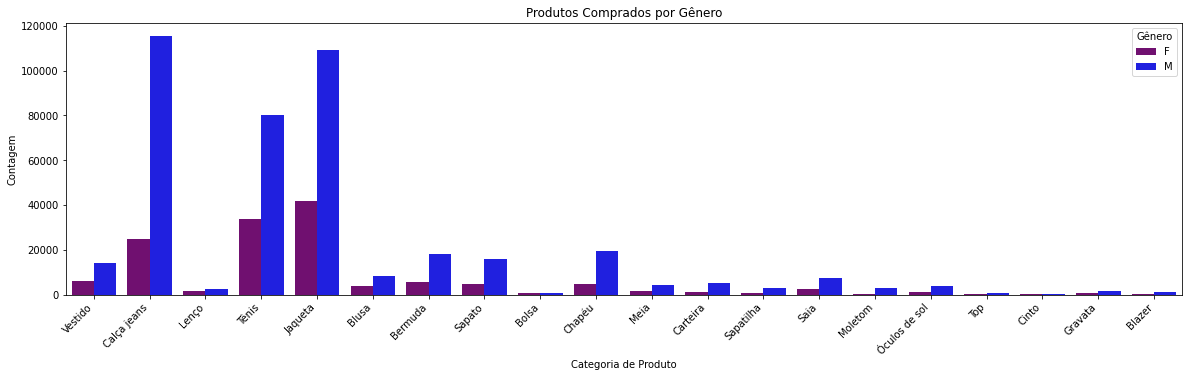

In [0]:
plt.figure(figsize=(20, 5)) 

sns.countplot(x="Categoria_Produto", data=df, hue="Gênero", palette=cores)

plt.xlabel('Categoria de Produto')
plt.ylabel('Contagem')
plt.title('Produtos Comprados por Gênero')
plt.xticks(rotation=45, ha='right')


plt.show()

# A categoria que o gênero Masculino mais adquire é: Calça Jeans
# A categoria que o gênero Feminino mais adquire é: Jaqueta

**Visto que a venda de produtos está muito concentrada em Jaqueta, Calça Jeans e Tenis, podemos:**
    
- Realizar uma parceria com a LIVELO oferecendo um sistema de pontuação quando o cliente adquirir algum dos produtos da lista: Cinto, Gravata, Lenço, Bolsa e Blazer. 


**Campanha cross-selling:**
- Toda vez que o cliente adicionar no carrinho uma Jaqueta e for finalizar a compra, irá aparecer um pop-up ofertando os melhores preços em Calça Jeans e Tenis, com o objetivo de que ele adquira pelo menos mais um item.

- Qual o produto que mais trouxe lucro e o produto que trouxe menos?

In [0]:
#Valor arrecadado com a venda de cada produto:

df.groupby('Categoria_Produto').agg(cidade_gasto=('Valor_Compra', 'sum')).reset_index().sort_values('cidade_gasto', ascending=False)

# O produto que mais trouxe lucro foi: Calça Jeans
# O produto que menos trouxe lucro foi: Blazer

,Categoria_Produto,cidade_gasto
4,Calça jeans,1.910014e+09
9,Jaqueta,9.418352e+08
17,Tênis,8.543188e+08
15,Sapato,3.241503e+08
0,Bermuda,2.685162e+08
18,Vestido,2.040847e+08
13,Saia,1.451206e+08
6,Chapéu,1.137911e+08
19,Óculos de sol,1.008373e+08
5,Carteira,9.296904e+07


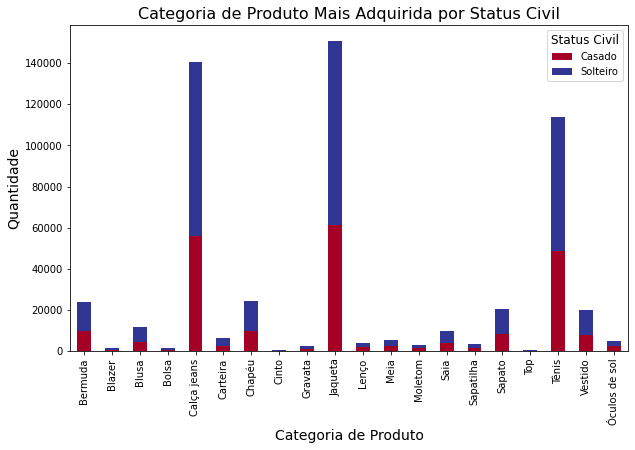

In [0]:
produto_por_status_civil = df.groupby(['Categoria_Produto', 'Status_Civil']).size().unstack()

ax = produto_por_status_civil.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlBu')
ax.set_title('Categoria de Produto Mais Adquirida por Status Civil', fontsize=16)
ax.set_xlabel('Categoria de Produto', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.legend(title='Status Civil', title_fontsize=12)

plt.show()


**Analisando esse cenário, pensamos em uma estratégia cross-selling para o publico casado:**
- Disparar uma campanha "Aproveite a Black Friday para se vestir bem com o seu amor!", ofertando 15% de desconto no segundo item, contanto que o conjugue realize um cadastro em nosso site.

**Conclusões gerais:**
 - Continuar investindo nas Jaquetas,  Calças Jeans e Tênis, pois são os produtos que mais dão lucro;
 - Fazer campanhas para trazer as pessoas com idade: 46+ e jovens;
 - Investir em mais anuncios que chamem a atenção das mulheres e em produtos que agradem mais esse público (fazer pesquisa de mercado);
 - Investir em publicidade nas cidades de porte médio, pois são as cidades que menos trazem receita para a companhia;
 - Pensar na substituição dos Top's, Cintos e Bolsas, por produtos que o público das cidades tenham mais afinidade. (Produtos menos vendidos)
 - Como a maior parte dos clientes são de cidades pequenas, podemos pensar na possibilidade de Frete Grátis para essas cidades. (Considerando que por ser afastado o frete geralmente costuma ser mais caro)
- Seguindo nessa linha, podemos disparar uma campanha de cross-selling, ou seja, oferecer mais produtos ao cliente, com a tentativa de que o cliente compre mais um ou dois produtos.

Base de dados utilizada: https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda